In [57]:
import numpy  as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt 
%matplotlib inline

import seaborn as sns

import json 

import warnings
warnings.filterwarnings(action='ignore')

from datetime import date, datetime, timedelta
from dateutil.parser import parse


# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 


# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


# crawling
from bs4 import BeautifulSoup
from urllib.request import urlopen , urlretrieve
from urllib.error   import HTTPError
from urllib.error   import URLError

import requests 
import re

from selenium import webdriver

from time    import sleep , time 
from random  import randint
from IPython.core.display import clear_output

# 비정형 디비 
import pymongo as mongo

# print('numpy version  - ' , np.__version__)
# print('pandas version - ' , pd.__version__)

#graph
import graphviz
import missingno as msno



# ml 
import sklearn
from   sklearn.datasets import load_iris
from   sklearn.datasets import load_breast_cancer

from   sklearn.model_selection import train_test_split , KFold , StratifiedKFold, cross_val_score , cross_validate , GridSearchCV
from   sklearn.tree            import DecisionTreeClassifier , export_graphviz , plot_tree
from   sklearn.metrics         import accuracy_score
from   sklearn.preprocessing   import LabelEncoder , OneHotEncoder , MinMaxScaler , StandardScaler
from   sklearn.impute          import SimpleImputer

sklearn.__version__

'0.24.2'

#### 피처중요도 및 머신러닝 데이터 전처리
 - GridSearchCV를 이용한 피처중요도

In [2]:
params = {
    'criterion' : ['gini' , 'entropy'] , 
    'splitter'  : ['best' , 'random']  ,
    'max_depth' : [1 , 2 , 3 ] , 
    'min_samples_split' : [2 , 3]
}

iris = load_iris() 

X_train , X_test , y_train , y_test = train_test_split(iris.data   , 
                                                       iris.target ,
                                                       test_size    = 0.25 ,
                                                       shuffle      = True , 
                                                       random_state = 200 )


dt_model = DecisionTreeClassifier(random_state = 100)

# refit -> 가장 좋은 파라미터 설정으로 재학습 시킴
grid_tree_model = GridSearchCV(dt_model , param_grid = params , cv = 3 , refit = True)
grid_tree_model.fit(X_train , y_train)
grid_tree_model.cv_results_


{'mean_fit_time': array([0.00166225, 0.00100716, 0.00033299, 0.00098944, 0.00066471,
        0.00099031, 0.00033243, 0.00032266, 0.00066447, 0.00033259,
        0.00033267, 0.00066415, 0.00099683, 0.00100724, 0.000331  ,
        0.        , 0.00066487, 0.00099738, 0.00132982, 0.00100231,
        0.00132593, 0.00065303, 0.00033871, 0.00132418]),
 'std_fit_time': array([9.40211942e-04, 1.44452717e-05, 4.70920787e-04, 1.09586129e-05,
        4.70022017e-04, 2.15214500e-05, 4.70134046e-04, 4.56309880e-04,
        4.70089012e-04, 4.70358829e-04, 4.70471221e-04, 4.69629101e-04,
        1.94667955e-07, 1.28780368e-05, 4.68110997e-04, 0.00000000e+00,
        4.70134409e-04, 4.05233662e-07, 4.70416244e-04, 1.68868139e-05,
        4.73872119e-04, 4.61970600e-04, 4.79012982e-04, 4.62311269e-04]),
 'mean_score_time': array([0.0003322 , 0.00033267, 0.        , 0.        , 0.00033951,
        0.        , 0.00032934, 0.00066543, 0.        , 0.00032449,
        0.00099444, 0.00034094, 0.        , 0.  

In [3]:
pd.DataFrame(grid_tree_model.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
20,0.001326,4.738721e-04,0.000000,0.000000,entropy,3,2,best,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.947368,0.945946,0.945946,0.946420,0.000671,1
22,0.000339,4.790130e-04,0.000333,0.000470,entropy,3,3,best,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.947368,0.945946,0.945946,0.946420,0.000671,1
8,0.000664,4.700890e-04,0.000000,0.000000,gini,3,2,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.947368,0.945946,0.945946,0.946420,0.000671,1
10,0.000333,4.704712e-04,0.000994,0.000004,gini,3,3,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.947368,0.945946,0.945946,0.946420,0.000671,1
18,0.001330,4.704162e-04,0.000665,0.000470,entropy,2,3,best,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.868421,0.945946,0.891892,0.902086,0.032460,5
4,0.000665,4.700220e-04,0.000340,0.000480,gini,2,2,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.868421,0.945946,0.891892,0.902086,0.032460,5
16,0.000665,4.701344e-04,0.000333,0.000471,entropy,2,2,best,"{'criterion': 'entropy', 'max_depth': 2, 'min_...",0.868421,0.945946,0.891892,0.902086,0.032460,5
6,0.000332,4.701340e-04,0.000329,0.000466,gini,2,3,best,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.868421,0.945946,0.891892,0.902086,0.032460,5
11,0.000664,4.696291e-04,0.000341,0.000482,gini,3,3,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.815789,0.837838,0.837838,0.830488,0.010394,9
21,0.000653,4.619706e-04,0.000333,0.000471,entropy,3,2,random,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.815789,0.837838,0.837838,0.830488,0.010394,9


In [4]:
# 피처의 중요도를 시각화 - 트리 분류 형성에 각 피쳐가 얼마나 잘 작용했는지를 평가하는지표 
# 트리 분류 형성에 각 피처가 얼마나 잘 적용했는지를 평가하는 지표 
# 해당 지표는 0  ~ 1 사이의 값을 가지며 0이면 특성이 전혀 고려되지 않을 것 
# 특성의 중요도의 합은 1이다. 
# feature importance - estimator.feature_importances_

In [5]:
estimator = grid_tree_model.best_estimator_
estimator

DecisionTreeClassifier(max_depth=3, random_state=100)

In [6]:
estimator.feature_importances_
# 트리 분류 형성에 각 피처가 얼마나 잘 작용했지는 평가하는 지표 
#해당 지표는 0 ~ 1 사이의 값을 가지며 0이면 특성이 전혀 고려되지 않을 것 
# 특성의 중요도의합은 1이다. 

array([0.        , 0.        , 0.59075728, 0.40924272])

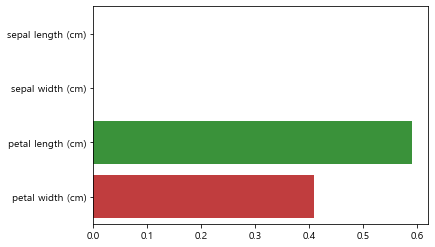

sepal length (cm) 	 0.0
sepal width (cm) 	 0.0
petal length (cm) 	 0.5907572799205508
petal width (cm) 	 0.4092427200794493


In [7]:
sns.barplot(x=estimator.feature_importances_ , y=iris.feature_names)
plt.show()
plt.close()

for name, value in zip(iris.feature_names , estimator.feature_importances_) :
    print(name, '\t' , value)

- loa_breas_cancer 데이터를 이용한 GridSearchCV - 피처 중요도 실습 

In [178]:
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [9]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [10]:
cancer_frm =  pd.DataFrame(cancer.data , columns=cancer.feature_names )
cancer_frm['target'] = cancer.target 
cancer_frm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
# DecisionTrewe Estimator - 
# train, test : 7:3 
# 학습예측  fit. predict 
# accuracy_score 

In [200]:
X_train ,X_test ,  y_train, y_test  = train_test_split(cancer.data ,
                                                          cancer.target,
                                                          test_size = 0.3 ,
                                                          shuffle=True,
                                                          random_state=200)
# shape을 찍는연습을 하자 
X_train.shape , X_test.shape, y_train.shape ,y_test.shape

((398, 30), (171, 30), (398,), (171,))

In [201]:
# 모델 결정 후 모델 생성(fit)
cancer_model = DecisionTreeClassifier()
cancer_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [202]:
# 예측은 학습데이터를 넣으면안된다! 학습데이터인 x_train을 넣어버리면 답을 알려주고 시험을 하는 셈이다. 

y_pred = cancer_model.predict(X_test)
print('answer - ' , y_test)
print('pred ' , y_pred)
# 정답은 test , 컴퓨터가 예상한것은 y_pred
accuracy_score(y_test, y_pred)

answer -  [1 0 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 0]
pred  [1 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1
 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 0 1 1 0 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0]


0.935672514619883

In [203]:
# 성능평가 
print('graphvis 트리시각화 - ')
# export_graphviz(cancer_model,
#                 out_file='cancer_tree.dot' ,
#                 class_names=cancer.target_names,
#                 feature_names=cancer.feature_names,
#                 impurity=True,
#                 filled=True)


graph_cancer_model = DecisionTreeClassifier(  criterion   = 'gini', 
                                              max_depth = 3,
                                              min_samples_split = 2,
                                              splitter       = 'best') 

graphvis 트리시각화 - 


In [204]:
graph_cancer_model.fit(X_train, y_train) 
export_graphviz(graph_cancer_model , 
                out_file      = 'cancer_tree.dot' , 
                class_names   = cancer.target_names , 
                feature_names = cancer.feature_names ,
                impurity = True , 
                filled   = True)


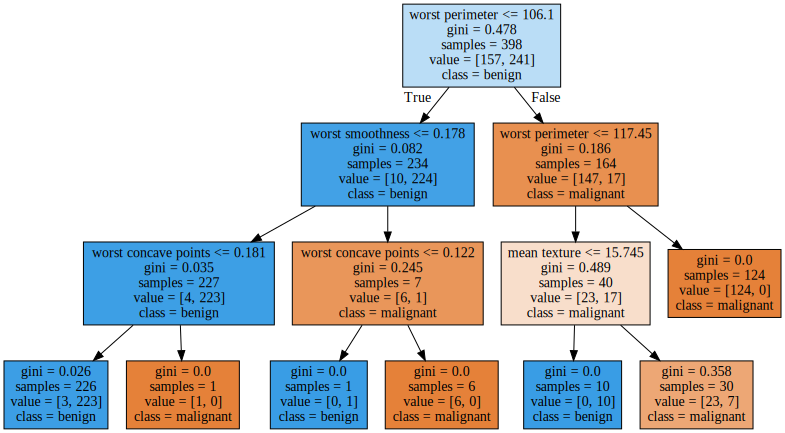

In [205]:
import os 
os.environ['PATH'] += os.pathsep + 'C:\Program Files\Graphviz\bin'

with open('./cancer_tree.dot') as file : 
    cancer_graph= file.read()
    
graphviz.Source(cancer_graph)

In [17]:
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [18]:
# 파라미터
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclass#sklearn.tree.DecisionTreeClassifier

In [207]:
params = {
    'criterion' : ['gini' , 'entropy'],
    'splitter' : ['best' , 'random'], # spllitter라고 했다. 오타 주의 
    'max_depth' : [1,2,3] , 
    'min_samples_split' : [2, 3 ]
}


grid_tree_model = GridSearchCV(cancer_model, param_grid=params, cv=3 , refit= True)
grid_tree_model.fit(X_train , y_train)
grid_tree_model.cv_results_

{'mean_fit_time': array([0.00099746, 0.        , 0.00099667, 0.        , 0.00166257,
        0.00099762, 0.0013295 , 0.00099738, 0.0029912 , 0.00033267,
        0.00232633, 0.00033267, 0.00099762, 0.00066519, 0.0009973 ,
        0.00033267, 0.00332467, 0.00099707, 0.00232697, 0.00099738,
        0.00398906, 0.0009973 , 0.00332451, 0.00066487]),
 'std_fit_time': array([4.89903609e-07, 0.00000000e+00, 4.89903609e-07, 0.00000000e+00,
        4.70247445e-04, 7.37000982e-07, 4.69965550e-04, 7.86741172e-07,
        8.14880337e-04, 4.70471221e-04, 4.69965469e-04, 4.70471221e-04,
        4.89903609e-07, 4.70358870e-04, 5.15042996e-07, 4.70471221e-04,
        4.70246478e-04, 3.37174788e-07, 4.70190736e-04, 1.12391596e-07,
        8.14393390e-04, 8.14296054e-04, 4.70864682e-04, 4.70134046e-04]),
 'mean_score_time': array([0.        , 0.        , 0.00066519, 0.00099746, 0.00033236,
        0.00033212, 0.00066471, 0.        , 0.00033275, 0.00033236,
        0.00033299, 0.        , 0.00066479, 0.  

In [208]:
estimator = grid_tree_model.best_estimator_
estimator

DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter='random')

In [209]:
estimator.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02131198, 0.03066582, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.42590761, 0.        , 0.        ,
       0.        , 0.52211459, 0.        , 0.        , 0.        ])

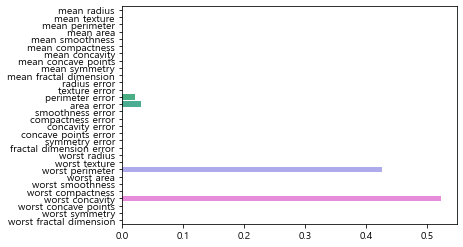

In [210]:
sns.barplot(x=estimator.feature_importances_ , y=cancer.feature_names)
plt.show()
plt.close()

#### 데이터 전처리 
 - 데이터 인코딩( ml 문자열값을 입력값으로 허용할수 없다.) -> 숫자형으로 변환하는 작업이 필요하다.
 - 레이블인코딩, 원-핫-인코딩 
 - 주의사항 ) 회귀에서는 적용이 안된다. , 트리계열의 알고리즘에 적용 
            (성능이 떨어진다는 단점 because 문자를 숫자로 변경하면 숫자의 특성이 반영된다. 뭔소리여 )
 - 입력값은 결측값이 허용하지 않는다. -> 고정된 다른값으로 변환 
 - 이상치 
 - 피처 스케일링 : 정규화(0~1), 표준화 (정규분포를 따르는 형식 평균 0 , 분산 1 가우시안 분포 )  ,
 - 정규화 : MinMaxScalar 
 - 표준화 : StandardScalar 
 
 

 - 레이블인코딩 문자를 숫자로 변환 : LabelEncoder : fit() , transform() , fit_transform()

In [22]:
label_items = ['낫또' , '집밥' , 'ABC쥬스' , '육계장 칼국수' , '낫또']
encoder = LabelEncoder()
label_digit = encoder.fit(label_items).transform(label_items)

print('digit -', label_digit) # 인코더 레이블을 문자열 -> 숫자로 알아서 바꾸어준다. 숫자자체에는 의미는 없다. 
print('label - ' , encoder.classes_) # 인코더 레이블을 다시가져온다.
print('label - ' , encoder.inverse_transform([1,3,0,2,1])) # 원복 

digit - [1 3 0 2 1]
label -  ['ABC쥬스' '낫또' '육계장 칼국수' '집밥']
label -  ['낫또' '집밥' 'ABC쥬스' '육계장 칼국수' '낫또']


 - 원 핫 인코딩 

In [23]:
print('type - ' , type(label_digit)) # 문자열을 레이블을 변호나하면 ndarray 타입으로 변경된다. 
print('2차원데이터로 변환 ') 

reshape_digit = label_digit.reshape(-1 , 1 )
reshape_digit


type -  <class 'numpy.ndarray'>
2차원데이터로 변환 


array([[1],
       [3],
       [0],
       [2],
       [1]])

In [24]:
print(reshape_digit.shape)

(5, 1)


In [25]:
# sklearn imporkt Onehotencoder 추가할것 
one_hot_encoder = OneHotEncoder()
one_hot_encoder_label = one_hot_encoder.fit(reshape_digit).transform(reshape_digit)

In [26]:
print('shape - ' , one_hot_encoder_label)
print(one_hot_encoder_label.shape) # 5,1 -> 5,4로변경되었다. 


shape -    (0, 1)	1.0
  (1, 3)	1.0
  (2, 0)	1.0
  (3, 2)	1.0
  (4, 1)	1.0
(5, 4)


In [27]:
encoder_frm = pd.DataFrame({ 'labl_items' : ['낫또' , '집밥' , 'ABC 쥬스' , '육계장 칼국수' , '낫또']
    
})
pd.get_dummies(encoder_frm)

,labl_items_ABC 쥬스,labl_items_낫또,labl_items_육계장 칼국수,labl_items_집밥
0,0,1,0,0
1,0,0,0,1
2,1,0,0,0
3,0,0,1,0
4,0,1,0,0


- 결측치 시각화 
-

In [28]:
# 문자열로 만든 더미데이터 
from io import StringIO

csv_data = StringIO("""
x1,x2,x3,x4,x5
1,0.1,"1",2019-01-01,A
2,,,2019-01-02,B
3,,"3",2019-01-03,C
,0.4,"4",2019-01-04,A
5,0.5,"5",2019-01-05,B
,,,2019-01-06,C
7,0.7,"7",,A
8,0.8,"8",2019-01-08,B
9,0.9,,2019-01-09,C
""")


In [29]:
df = pd.read_csv(csv_data)
df

,x1,x2,x3,x4,x5
0,1.0,0.1,1.0,2019-01-01,A
1,2.0,NaN,NaN,2019-01-02,B
2,3.0,NaN,3.0,2019-01-03,C
3,NaN,0.4,4.0,2019-01-04,A
4,5.0,0.5,5.0,2019-01-05,B
5,NaN,NaN,NaN,2019-01-06,C
6,7.0,0.7,7.0,NaN,A
7,8.0,0.8,8.0,2019-01-08,B
8,9.0,0.9,NaN,2019-01-09,C


In [48]:
titanic = sns.load_dataset('titanic')


<AxesSubplot:>

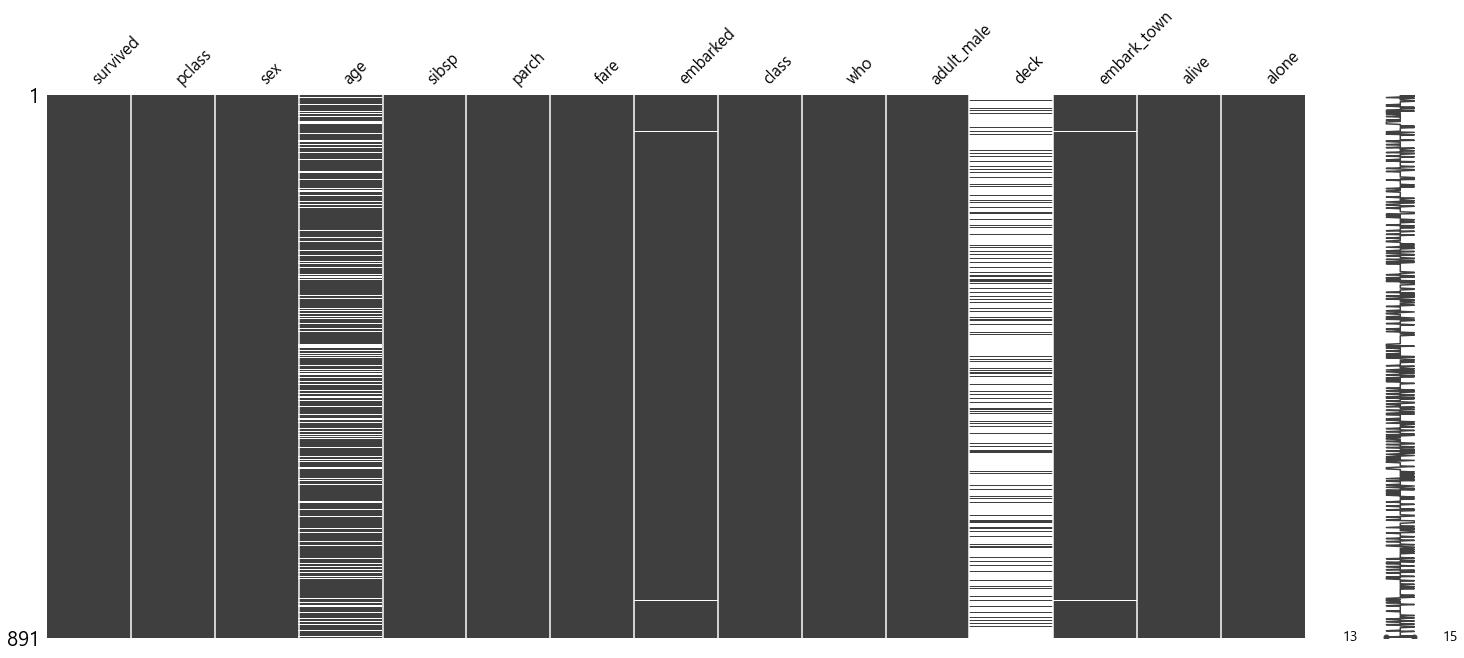

In [49]:
msno.matrix(titanic)

In [32]:
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

In [33]:
# 결측값을 너무 많다.  전처리로 age의 평균값으로 채워넣었다. 
titanic_age_imputer = SimpleImputer(strategy='mean')
titanic['age'] = titanic_age_imputer.fit_transform(titanic[['age']])

<AxesSubplot:>

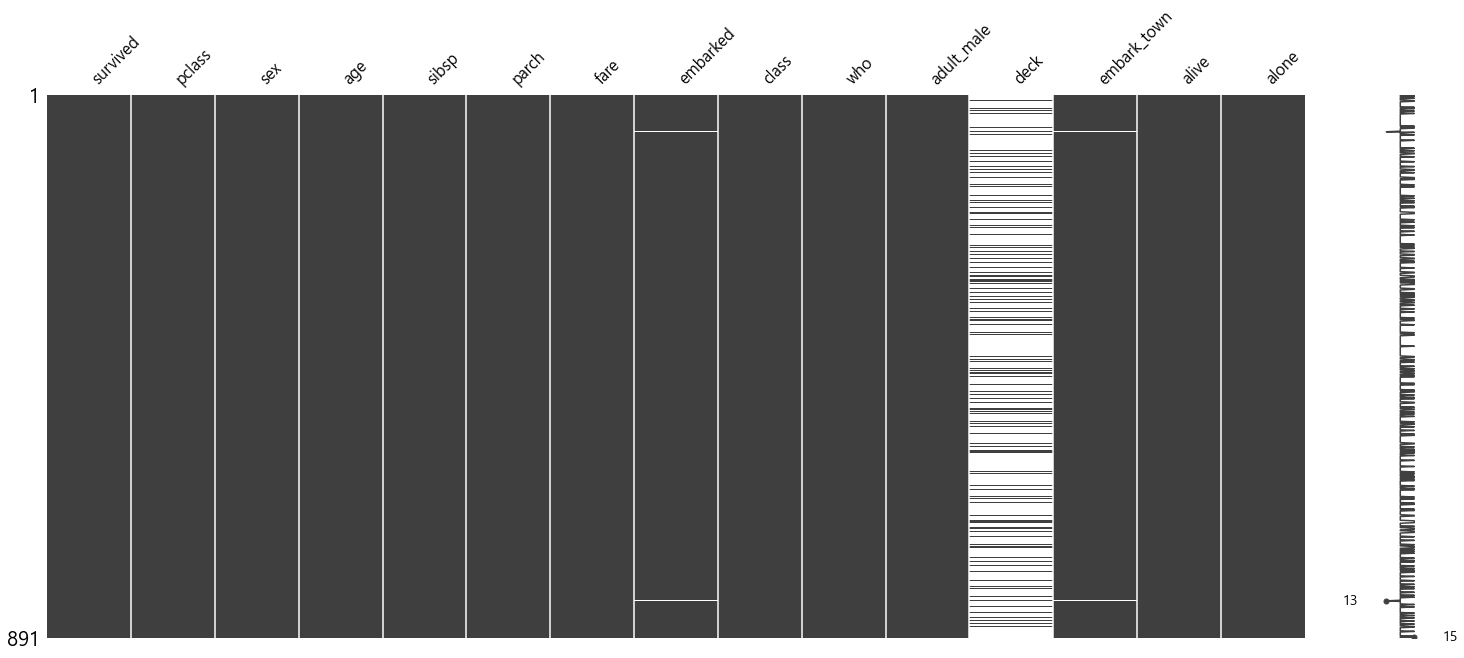

In [34]:
# 결측값을 평균으로 다 대체하였다.  위의 그래프와 비교해볼것. 

msno.matrix(titanic)

In [50]:
# deck도 데이터가 결손이 너무 많다. 어떻게 대체할가? 
# 문자의 평균을 구할방법은 없다 ; 
# strategy = mean 평균값, 아니면 mdeian (중앙값 ) , most_frequent : 빈도수 , 
titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

<AxesSubplot:>

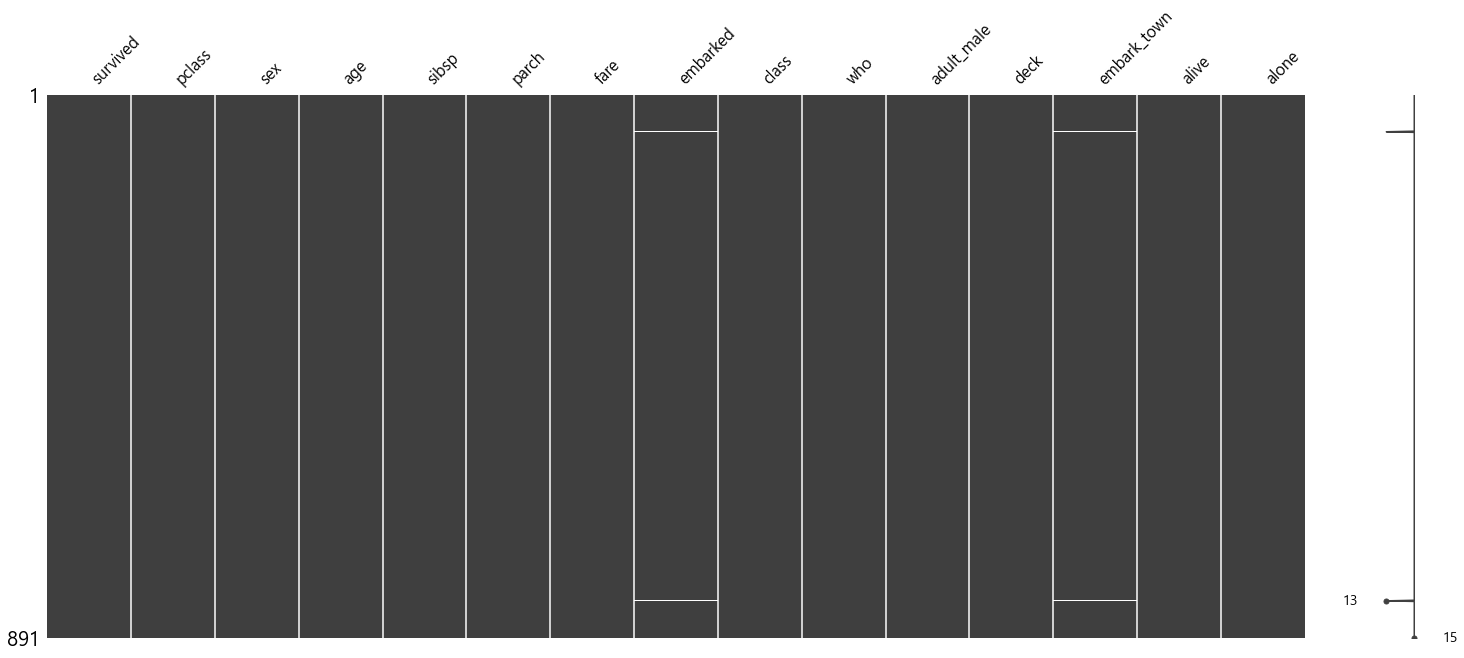

In [36]:
# 대체를 최빈값으로 대체한다면 ? SimpleImputer 
titanic_deck_imputer = SimpleImputer(strategy='most_frequent')
titanic['deck'] = titanic_deck_imputer.fit_transform(titanic[['deck']])
msno.matrix(titanic)

In [38]:
titanic['deck'].value_counts()
# 결측값을 C로 때려박았다. 

C    747
B     47
D     33
E     32
A     15
F     13
G      4
Name: deck, dtype: int64

In [39]:
# 반대로 가장 적은 G값으로 대체하고싶다면 ?  
titanic['deck'] = titanic['deck'].fillna('G')
# 대부분값을 G로 때려박았다. 


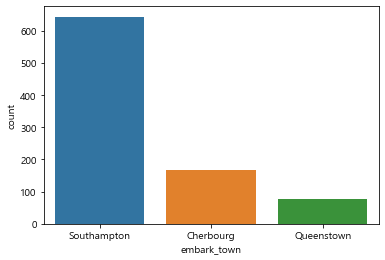

In [43]:
sns.countplot(titanic.embark_town)
plt.show()
plt.close()

In [44]:
# deck - 최빈값으로 대체한다면 ? SimpleImputer
# embark, embark_town 

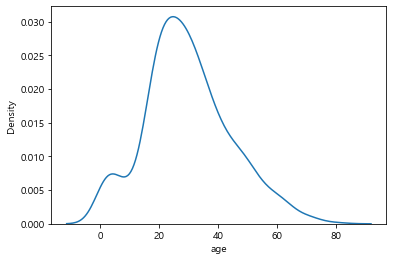

In [55]:
# 데이터의 분포를 확인할 때 

sns.kdeplot(titanic.age)
plt.show()
plt.close()

###### 정규호와 표준화의 차이를 알아야 써먹을때를 감을 잡을수있다. 

- Featurer Scaling 
- 정규화 ( x = x의 최소값) / (x최대값 - x 최소값) -> MinMaxScaler 
- 표준화 ( x -x의평균값 / x의표준편차 )-> StandardScaler

In [59]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [215]:
iris_frm = pd.DataFrame(data = iris.data ,
                        columns=iris.feature_names)
iris_frm
print('mean - ')
print(iris_frm.mean())
print('std')
print(iris_frm.std())
print('val')
print(iris_frm.var()) # val 이 아니라 var 이다!! -_-      

mean - 
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
std
sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64
val
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [84]:
print('표준화 - ')
s_caler = StandardScaler()
s_iris = s_caler.fit_transform(iris_frm)
s_iris

표준화 - 


array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [87]:
standard_iris_frm = pd.DataFrame(data = s_iris ,
                        columns=iris.feature_names)


In [92]:
# 정규화 

m_scaler = MinMaxScaler()

m_iris = m_scaler.fit_transform(iris_frm)
m_iris_frm = pd.DataFrame(data = m_iris, columns=iris.feature_names)

m_iris_frm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv


In [119]:
tmp_frm = pd.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv' ,header=None , 
                      usecols=[0,2,13])

# usecols를 써도 되고 padnas 문법을 써도되는데 usecols가 훨씬편하네 



# 0번째가 아마 타겟일것같다. 데이터를 확인해보면 13번째 값이 유독 크다. 이값을 처리하지 않으면 아마 성능이 많이 떨어질것같다. 
# 0번째 2번째 13번째 만 불러와보자 
tmp_frm.columns = ['target' , 'x' , 'y']
tmp_frm

,target,x,y
0,1,1.71,1065
1,1,1.78,1050
2,1,2.36,1185
3,1,1.95,1480
4,1,2.59,735
...,...,...,...
173,3,5.65,740
174,3,3.91,750
175,3,4.28,835
176,3,2.59,840


In [216]:
X_train, X_test, y_train, y_test = train_test_split(tmp_frm[['x','y']],tmp_frm['target'],test_size= 0.25 ,shuffle= True )

tmp_model = DecisionTreeClassifier()
tmp_model.fit(X_train, y_train)

y_pred = tmp_model.predict(X_test)
accuracy_score(y_test,y_pred)







0.7777777777777778

In [217]:
print('스케일링 후 학습을 시켜보자 - model case 02')
print('주의사항이 있음 - 샘플코드를 통해서 확인해 보자 - ')
print()
print('문제점을 파악해 보자 - ')

train_data = np.arange(0, 11).reshape(-1, 1)
print('train - ')
print(train_data)

test_data = np.arange(0, 6).reshape(-1, 1)
print('test - ')
print(test_data)


스케일링 후 학습을 시켜보자 - model case 02
주의사항이 있음 - 샘플코드를 통해서 확인해 보자 - 

문제점을 파악해 보자 - 
train - 
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
test - 
[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]


In [218]:
print('학습 데이터의 정규화 - ') 
scaler = MinMaxScaler()
scaler.fit(train_data) 

s_train_data = scaler.transform(train_data) 
print('원본 데이터   - ' , train_data.reshape(-1))
print('정규화 데이터 - ' , s_train_data.reshape(-1))

학습 데이터의 정규화 - 
원본 데이터   -  [ 0  1  2  3  4  5  6  7  8  9 10]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [219]:
print('테스트 데이터의 정규화 - ') 

scaler.fit(test_data) 

s_test_data = scaler.transform(test_data) 

print('원본 데이터   - ' , test_data.reshape(-1))
print('정규화 데이터 - ' , s_test_data.reshape(-1))

테스트 데이터의 정규화 - 
원본 데이터   -  [0 1 2 3 4 5]
정규화 데이터 -  [0.  0.2 0.4 0.6 0.8 1. ]


In [220]:
s_tmp_frm = s_caler.fit_transform(tmp_frm.iloc[: , 1:3])
m_tmp_frm = m_scaler.fit_transform(tmp_frm.iloc[: , 1:3])

In [221]:
print('위와 같은 실수를 범하면 안된다!! 그래서 스케일링 기준은 학습데이터를 기준으로 테스데이터를 스케일해야함!!!')
print()

scaler = MinMaxScaler()
scaler.fit(train_data) 

s_train_data = scaler.transform(train_data) 
print('원본 데이터   - ' , train_data.reshape(-1))
print('정규화 데이터 - ' , s_train_data.reshape(-1))



s_test_data = scaler.transform(test_data) 

print('원본 데이터   - ' , test_data.reshape(-1))
print('정규화 데이터 - ' , s_test_data.reshape(-1))



위와 같은 실수를 범하면 안된다!! 그래서 스케일링 기준은 학습데이터를 기준으로 테스데이터를 스케일해야함!!!

원본 데이터   -  [ 0  1  2  3  4  5  6  7  8  9 10]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 데이터   -  [0 1 2 3 4 5]
정규화 데이터 -  [0.  0.1 0.2 0.3 0.4 0.5]


In [152]:
s_tmp_frm

array([[-0.5622498 ,  1.01300893],
       [-0.49941338,  0.96524152],
       [ 0.02123125,  1.39514818],
       [-0.34681064,  2.33457383],
       [ 0.22769377, -0.03787401],
       [-0.51736664,  2.23903902],
       [-0.4186237 ,  1.72952002],
       [-0.16727801,  1.74544249],
       [-0.62508622,  0.94931905],
       [-0.88540853,  0.94931905],
       [-0.15830138,  2.43010864],
       [-0.76871232,  1.69767508],
       [-0.54429654,  1.82505483],
       [-0.54429654,  1.28369089],
       [-0.4186237 ,  2.54793491],
       [-0.47248348,  1.79320989],
       [-0.37374054,  1.69767508],
       [-0.68792264,  1.22000102],
       [-0.66996938,  2.97147258],
       [ 0.68550197,  0.3124203 ],
       [-0.63406285,  0.10542821],
       [ 1.31386618,  0.07358327],
       [-0.42760033,  0.91747411],
       [-0.66099274,  0.85378424],
       [-0.47248348,  0.3124203 ],
       [-0.25704433,  0.2646529 ],
       [-0.50839001,  1.42699311],
       [-0.55327317,  1.71359755],
       [-0.3916938 ,

In [153]:
m_tmp_frm

array([[0.1916996 , 0.56134094],
       [0.2055336 , 0.55064194],
       [0.3201581 , 0.64693295],
       [0.23913043, 0.85734665],
       [0.36561265, 0.32596291],
       [0.20158103, 0.83594864],
       [0.22332016, 0.72182596],
       [0.27865613, 0.7253923 ],
       [0.17786561, 0.54707561],
       [0.12055336, 0.54707561],
       [0.28063241, 0.87874465],
       [0.14624506, 0.7146933 ],
       [0.19565217, 0.74322397],
       [0.19565217, 0.62196862],
       [0.22332016, 0.90513552],
       [0.21146245, 0.7360913 ],
       [0.23320158, 0.7146933 ],
       [0.16403162, 0.60770328],
       [0.16798419, 1.        ],
       [0.46640316, 0.40442225],
       [0.17588933, 0.35805991],
       [0.60474308, 0.35092725],
       [0.22134387, 0.53994294],
       [0.16996047, 0.5256776 ],
       [0.21146245, 0.40442225],
       [0.25889328, 0.39372325],
       [0.20355731, 0.65406562],
       [0.19367589, 0.71825963],
       [0.22924901, 0.45435093],
       [0.18577075, 0.53994294],
       [0.

In [156]:
s_tmp_frm = pd.DataFrame(s_tmp_frm , columns=['x' ,'y'])
s_tmp_frm['target'] = tmp_frm['target']
s_tmp_frm

,x,y,target
0,-0.562250,1.013009,1
1,-0.499413,0.965242,1
2,0.021231,1.395148,1
3,-0.346811,2.334574,1
4,0.227694,-0.037874,1
...,...,...,...
173,2.974543,-0.021952,3
174,1.412609,0.009893,3
175,1.744744,0.280575,3
176,0.227694,0.296498,3


In [158]:
# 머신러닝 학습?? 

# 정규화 
X_train, X_test, y_train, y_test = train_test_split(s_tmp_frm[['x','y']],s_tmp_frm['target'],test_size= 0.25 ,shuffle= True )

s_tmp_model = DecisionTreeClassifier()
s_tmp_model.fit(X_train, y_train)

y_pred = s_tmp_model.predict(X_test)
accuracy_score(y_test,y_pred)







0.7555555555555555

In [160]:
#표준화 
# m_tmp_frm = m_scaler.fit_transform(tmp_frm.iloc[: , 1:3]) 데이터를 표준화 하는 코드 위에서 실행됨 


m_tmp_frm = pd.DataFrame(m_tmp_frm , columns=['x' ,'y'])
m_tmp_frm['target'] = tmp_frm['target']
m_tmp_frm


X_train, X_test, y_train, y_test = train_test_split(s_tmp_frm[['x','y']],s_tmp_frm['target'],test_size= 0.25 ,shuffle= True )

m_tmp_model = DecisionTreeClassifier()
m_tmp_model.fit(X_train, y_train)

y_pred = m_tmp_model.predict(X_test)
accuracy_score(y_test,y_pred)




0.8

In [174]:
# 학습데이터와 테스트 데이터 모두 정규화 표준화 되어야 한다. 
 # 같은데이터인데 테스트와 학습데이터가 수치가 달라진다. 기준이 틀어져버린다. 
    # 스케일링이 기준은 학습데이터를 기준으로 테스데이터를 스케일링해야 함 !!!!  
      # fit을 쓰지말고 transform만 사용해라 ? 03:00:00 부근 동영상 확인할것. 
        
        
    

In [222]:

### 매우 중요한 개념을 내포하고 있으니 위에 code와 비교를 꼭할것. 
# x_train 학습데이터이기 때문에 신경 ,y_train 라벨이기때문에 불필요 


X_train, X_test, y_train, y_test = train_test_split(tmp_frm[['x','y']],
                                                    tmp_frm['target'],
                                                    test_size= 0.25,
                                                    shuffle= True )
#############################
scaler =  MinMaxScaler()
scaler.fit(X_train)

# 기준을 만들지마라는 fit을하지마라
m_train_data = scaler.transform(X_train)
m_test_data = scaler.transform(X_test)
######################################


tmp_model = DecisionTreeClassifier()
tmp_model.fit(m_train_data, y_train)

##############################################
y_pred = tmp_model.predict(m_test_data)

print('answer - ' , y_test.values)
print('guess - ' , y_pred)

print('성능평가 - ' )
accuracy_score(y_test,y_pred)

print('테스트 데이터는 133개 , 학습데이터는 33개 각각의 개수가 다른상태에서 정규화나 표준화를 해버린다면 값이 틀어진다.',
        len(m_test_data) , len(m_train_data))


answer -  [2 1 2 1 1 2 1 3 1 2 2 2 1 3 3 2 1 1 1 3 2 3 2 2 1 3 1 2 1 1 2 2 2 2 2 2 2
 3 2 1 1 3 2 1 2]
guess -  [2 1 2 1 1 2 3 3 1 2 2 3 1 3 1 2 1 1 1 3 3 3 2 3 1 3 1 2 3 2 3 3 2 2 2 2 2
 3 2 1 1 3 2 1 2]
성능평가 - 
테스트 데이터는 133개 , 학습데이터는 33개 각각의 개수가 다른상태에서 정규화나 표준화를 해버린다면 값이 틀어진다. 45 133
